# Modelos Generativos

Los modelos generativos son 


Por ejemplo, consideremos un modelo generativo para el reconocimiento optico de caracteres a partir de 
imagenes binarias de digitos []. Las datos $\textbf x$ consisten de imagenes binarias de digitos del $0-9$ escaneados y redimensionados a $28 \times 28$ pixeles. 

Dado que los datos provienen de imagenes binarias donde cada pixel es independiente del otro, un modelo acorde es 
la distribucion de Bernoulli. Por lo tanto, la probabilidad de observar el pixel $x_i \in \{0,1\}$ esta dada por la distribucion de Bernoulli con parametro $\theta_i$
    
\begin{align}
p(\textbf {x} \vert \Theta)= \prod_{i=1}^{784} p(x_i \vert \theta_i)\\
p(x_i \vert \theta_i)=\theta_i^{x_i} (1-\theta_i)^{1-x_i}
\end{align}

Utilizando el teorema de Bayes:

\begin{align}
p(\Theta \vert  \textbf {x} ) =  \frac{p(\textbf {x} \vert \Theta)p(\Theta)}{p(\textbf {x})}
\end{align}

donde $\Theta = [\theta_1,\ldots,\theta_{784}]$

Si hacemos que la probabilidad apriori de cada pixel $p(\theta_i)$ sea una distribucion Beta, tenemos:

\begin{align}
p(\theta_i)= \frac{1}{B(\alpha,\beta)} \theta_i^{\alpha-1} (1-\theta_i)^{\beta-1}
\end{align}

donde $B(\alpha,\beta)$ es la funcion Beta.

Ahora, utlizamos $p(\theta_i)$:

\begin{align}
p(\Theta \vert  \textbf {x} ) \propto  \frac{1}{B(\alpha,\beta)^{784}} \prod_{i=1}^{784}    \theta_i^{x_i+\alpha-1} (1-\theta_i)^{1-x_i+\beta-1}
\end{align}


In [157]:
import time
import matplotlib.pyplot as plt
import numpy as np
import sklearn 

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

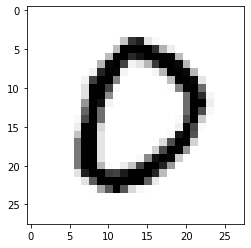

In [136]:
zero_data=X_train[y_train=='0',:]
plt.imshow(zero_data[0].reshape([28,28]), cmap='Greys')

In [137]:
binary_zero=(zero_data>128).astype(np.int)

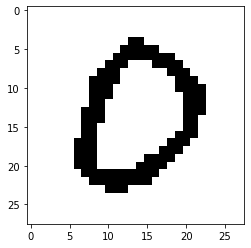

In [138]:
plt.imshow(binary_zero[0].reshape([28,28]), cmap='Greys')

Ahora consideramos el conjunto de datos $X=\{\mathbf x_j\}_{j=1}^N$. Primero obtenenos el estimador de maxima verosimilitud $\hat \Theta$:


\begin{align}
p(X \vert \Theta) &=  \prod_{j=1}^{N} \prod_{i=1}^{784} p(x_{j,i} \vert \theta_i)\\
& = \prod_{i=1}^{784} \binom{N}{\sum_j x_i} \theta_i^{\sum_j x_i} (1-\theta_i)^{1-\sum_j x_i}\\
\hat \Theta &= \frac{\partial{p(X \vert \Theta)}}{\partial{\Theta}}\\
& \equiv \frac{\partial{\operatorname{log} p(X \vert \Theta)}}{\partial{\Theta}}\\
\hat \theta_i &= \frac{\sum_j x_{j,i}}{N}
\end{align}

In [139]:
from scipy.stats import beta
from scipy.stats import bernoulli

n_data=binary_zero.shape[0]
theta=binary_zero.sum(axis=0)/n_data
p_x_theta_ml = [ bernoulli(p) for p in theta]

In [158]:
fake_data=np.asarray([p_x_theta_ml[i].rvs() for i in range(784)])

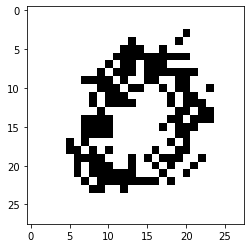

In [159]:
plt.imshow(fake_data.reshape([28,28]), cmap='Greys')

In [147]:
zero_test=X_test[y_test=='0',:]
binary_test=(zero_data>128).astype(np.int)
x_data=(binary_test[0])
log_likelihood=[p_x_theta_ml[i].logpmf(x_data) for i in range(784)]
print('ML log-likelihood : {0:0.2f}'.format(np.sum(log_likelihood)))

ML log-likelihood : -inf


In [148]:
xi_sum=binary_zero.sum(axis=0)
p_theta = [beta(xi_sum[i]+2,2+n_data-xi_sum[i]) for i in range(784)]

p_x_theta_map = [ bernoulli(p.rvs()) for p in p_theta]

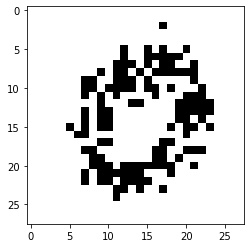

In [145]:
fake_data=np.asarray([p_x_theta_map[i].rvs() for i in range(784)])
plt.imshow(fake_data.reshape([28,28]), cmap='Greys')

In [149]:
log_like_zero=[]
for i in range(binary_test[0].shape[0]):
    x_data=(binary_test[i])
    log_likelihood=[p_x_theta_map[i].logpmf(x_data[i]) for i in range(784)]
    log_like_zero.append(np.sum(log_likelihood))
print('0 Test MAP log-likelihood (class 0): {0:0.2f}'.format(np.mean(log_like_zero)))

0 Test MAP log-likelihood (class 0): -198.22


In [146]:
one_test=X_test[y_test=='1',:]
binary_one=(one_data>128).astype(np.int)

log_like_one=[]
for i in range(binary_one[0].shape[0]):
    x_data=(binary_one[i])
    log_likelihood=[p_x_theta_map[i].logpmf(x_data[i]) for i in range(784)]
    log_like_one.append(np.sum(log_likelihood))
print('1 Test MAP log-likelihood (0 class) : {0:0.2f}'.format(np.mean(log_like_one)))

1 MAP log-likelihood (0 class) : -274.11


In [154]:
import pandas as pd

ll_zero=pd.DataFrame({'digit':['zero | zero']*binary_test[0].shape[0],'log-likelihood':log_like_zero})
ll_one=pd.DataFrame({'digit':['one | zero']*binary_one[0].shape[0],'log-likelihood':log_like_one})

In [155]:
df=pd.concat([ll_zero,ll_one])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f38604bbac8>,
      dtype=object)

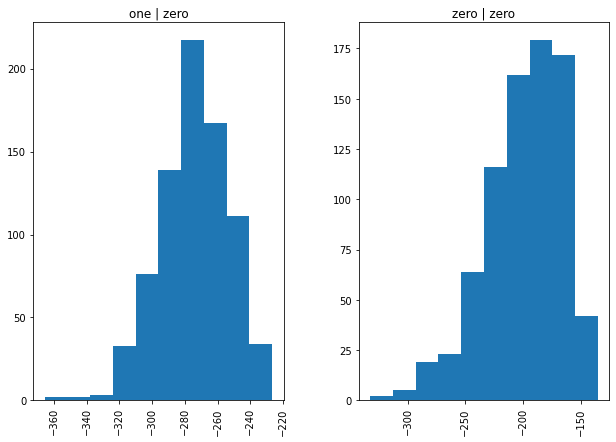

In [156]:
df.hist(by='digit',figsize=(10,7))